## Final Project Submission

Please fill out:
* Student name: **Hezron Rumenya**
* Student pace: **Part Time**
* Scheduled project review date/time: 
* Instructor name: **Maryann Mwikali**
* Blog post URL:


# Project: Risk-Optimized Aircraft Acquisition Strategy for Commercial and Private Aviation Venture



## Business Understanding

Our company is embarking on an exciting expansion into the aviation sector, aiming to diversify our business portfolio by purchasing and operating aircraft for both commercial and private enterprises. This strategic move taps into growing demand for flexible, premium air travel options while positioning us in a high-value industry with strong long-term potential. As with any new venture, it is critical that we fully understand the operational risks inherent to aviation, particularly regarding aircraft safety and reliability, to ensure we protect our brand, investments, and customers.

To support this initiative, a detailed analysis of  historical [aviation incident data](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) will be conducted. Our primary focus will be identifying aircraft models that demonstrate historically low risk based on factors such as fatalities, serious injuries, minor injuries, and incidents of aircraft destruction. Aircraft with minimal or no record of major accidents will be prioritized, ensuring that we recommend only the safest and most reliable models for acquisition. This risk-centered approach will provide us with the confidence that we can build an aviation division that not only meets market demand but does so with a strong emphasis on safety, operational resilience, and regulatory compliance. By leveraging this data-driven method in our purchasing strategy, we significantly increase the chances of operational success while mitigating potential liabilities. This understanding of the industry risks, coupled with a careful aircraft selection process, sets a strong foundation for a safe, scalable, and profitable aviation division.

### Project goal
Our project goal is to identify aircraft models that present the lowest operational risk based on analysis of historical aviation incident data. 

#### *Key Questions*
* Which aircraft models have the lowest rates of fatal and serious accidents?
* Which aircraft models have the fewest incidents resulting in the aircraft's damage?
* What types of aircraft are suitable for private and commercial enterprises?

### Project Stakeholders
In this project, several stakeholders are targeted in this new venture. They include; the company owners, company staff, suppliers, airline regulatory organs, clients including the general public. However, our primary focus at this point in our primary stakeholder requiring our advice based on our expert opinion is the head of the new aviation division. We aim to  provide reliable and actionable data insights for informing decisions on aircraft selection and operational strategies for businesses entering the aviation industry

In [40]:
# Load necessary libraries
import pandas as pd
import numpy as np
from numbers import Number
import warnings
warnings.filterwarnings('ignore') # disable all warnings in the program

In [41]:
# Loading the dataset
df = pd.read_csv('data/Aviation_Data.csv')
df.shape

(90348, 31)

In [42]:
df.info() # Check the structure and basic information of the loaded dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## Data and Analysis Plan

### *Dataset*
The [Aviation Accident Database Synopses](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) downloaded from Kaggle is a structured dataset containing detailed summaries of aviation accidents and incidents reported by the USA National Transportation Safety Board (NTSB). The dataset has 90,348 records and 31 columns (variables), with historical aviation recorded between 1940s to 2020s, covering both domestic and some international cases. The dataset also provides additional data relating to operational, environmental, and human factors that contribute to aviation accidents. 
Some of the key variables in the dataset include;
* Event Date
* Location
* Country
* Aircraft Make and Model
* Injury Severity
* Aircraft Damage Level
* Purpose of Flight
* Weather Conditions

### *Data Analysis Plan*
1. Check for duplicates records and drop
2. Check for missing values and appropriately address (example fill missing injury counts with zeros and remove entries with missing Make/Model)
3. Standardize categories by  cleaning inconsistent entries (example different spellings or formats for the same manufacturer).
4. Create new columns necessary for analysis and visualization (Example: year variable)
5. Create risk indicators: Summarize incidents into a composite Risk Score (weighing fatalities, injuries, and destruction).
6. Narrow down the scope for analysis (focus analysis on commercial or private flights based using on Purpose of Flight avariable).
7. Create required visualizations and interpet

**Step one - Handling of duplicate records**

In [43]:
# Check for duplicate records in the dataframe
df.duplicated().value_counts()

False    88958
True      1390
Name: count, dtype: int64

In [44]:
# Remove duplicates
df = df.drop_duplicates()

In [45]:
# Check the changes in the dimension of the dataframe after removal of duplicates
df.shape

(88958, 31)

In [46]:
# Alternative way to recheck for duplicates
df.duplicated().value_counts()

False    88958
Name: count, dtype: int64

**Step two - Handling of Missing Values**

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88958 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88958 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null  obj

In [48]:
# Drop records without make and model. These are critical variables in our decision-making
df= df.dropna(subset=['Make', 'Model'])
df.shape

(88777, 31)

In [49]:
# Replace missing values for integer variables with zeros
cols_to_fill = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']
df[cols_to_fill] = df[cols_to_fill].fillna(0)

**Step three - Standardizing categories**

In [50]:
# capitalize every category in the Make and Model column and remove any extra spaces at the start or end of each category
df['Make'] = df['Make'].str.strip().str.upper().str.replace(r'\s+', ' ', regex=True)
df['Model'] = df['Model'].str.strip().str.upper().str.replace(r'\s+', ' ', regex=True)

**Step four - Creating new columns**

In [51]:
# Create a column named Year by extacting first four characters of Event.Date column

# Make contents of Event.Date column a string (from object)
df['Event.Date'] = df['Event.Date'].astype(str)

# Extract the year from Event.Date and create a new column 'Event_Year'
df['Event_Year'] = df['Event.Date'].map(lambda x: x[:4])

# Check if the new df dataframe has a new column called 'Event_Year'
print(df[['Event.Date', 'Event_Year']].head())

   Event.Date Event_Year
0  1948-10-24       1948
1  1962-07-19       1962
2  1974-08-30       1974
3  1977-06-19       1977
4  1979-08-02       1979


In [52]:
# Create a new column to establish the total occupancy of each flight - Total Occupants=Total Fatal Injuries+Total Serious Injuries+Total Minor Injuries+Total Uninjured
df['Total_Occupants'] = (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + df['Total.Uninjured'])
df['Total_Occupants'].describe()

count    82880.000000
mean         6.298238
std         28.572146
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max        699.000000
Name: Total_Occupants, dtype: float64

### New categorical variable

To make our analysis useful, we need to create a variable that qualifies aircraft by passengers' volume variable (Total_Occupants) into some categories used in the aviation industry. This categorization will be useful in determining the low-risk airlines that our company can acquire. Using secondary information, we generated some categories as tabulated below.

|Category Name	      | Typical Passenger Range| Flight type                                |Category       |
----------------------|------------------------|--------------------------------------------|---------------|
|Regional Aircraft    | 19 to 100 passengers   |Short-haul domestic, Regional               |Domestic       |
|Small Narrow-body    | 100 to 150 passengers  |Short to medium-haul domestic and regional  |Regional       |
|Standard Narrow-body | 150 to 220 passengers  |Medium-haul domestic and short international|Regional       |
|Small Wide-body      | 220 to 300 passengers  |Medium to long-haul international           |International  |
|Large Wide-body	  | 300 to 400 passengers  |Long-haul international, intercontinental   |International  |
|Very Large Aircraft  | 400+ passengers        |Ultra long-haul, high-density hubs          |Ultra-long haul|

Also, for private enterprise acquisition strategy, we could consider the passenger volume (capacity) and flight range. In this data, we will similarly use total passenger volume to qualify the categories and create a new column that would enable us choose the less-risk aircraft for private enterprise.

|Category Name	      | Typical Passenger Range| Flight type                                |Category       |
----------------------|------------------------|--------------------------------------------|---------------|
|Very Light Jets (VLJs)| 2–4 passengers   |Short regional trips (1-2 hour flights)          |Domestic       |
|Light Jets    | 5–8 passengers  |Short-haul business trips, private charters  |Regional       |
|Midsize Jets | 7–10 passengers  |Cross-country U.S. flights, medium-range international|Regional       |
|Super-Midsize Jets     | 8–12 passengers  |U.S. coast-to-coast, Europe-Middle East           |International  |
|Large Cabin Jets	  | 10–16 passengers  |Transatlantic, international business travel   |International  |
|Ultra-Long-Range Jets  | 12–19 passengers        |Global nonstop flights (e.g., New York to Tokyo)    |Ultra-long haul|
|VIP Airliners (Bizliners)  | 20–100+ passengers        |VIP groups, heads of state, luxury charters   |Ultra-long haul|


In [53]:
# Import necessary libraries for data visulaization
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Define a function to classify based on Total Occupants
def classify_occupants(total):
    if pd.isna(total):
        return 'Unknown'
    elif total >= 19 and total <= 100:
        return 'Regional Aircraft'
    elif total > 100 and total <= 150:
        return 'Small Narrow-body'
    elif total > 150 and total <= 220:
        return 'Standard Narrow-body'
    elif total > 220 and total <= 300:
        return 'Small Wide-body'
    elif total > 300 and total <= 400:
        return 'Large Wide-body'
    elif total > 400:
        return 'Very Large Aircraft'
    else:
        return 'Below Regional'  # For very small aircraft like private planes

# Apply the function
df['Flight_Category'] = df['Total_Occupants'].apply(classify_occupants)

# Preview
#print(df[['Total_Occupants', 'Flight_Category']].head(30))
df['Flight_Category'].value_counts()

Flight_Category
Below Regional          80118
Unknown                  5897
Regional Aircraft        1169
Small Narrow-body         697
Standard Narrow-body      526
Small Wide-body           224
Large Wide-body            98
Very Large Aircraft        48
Name: count, dtype: int64

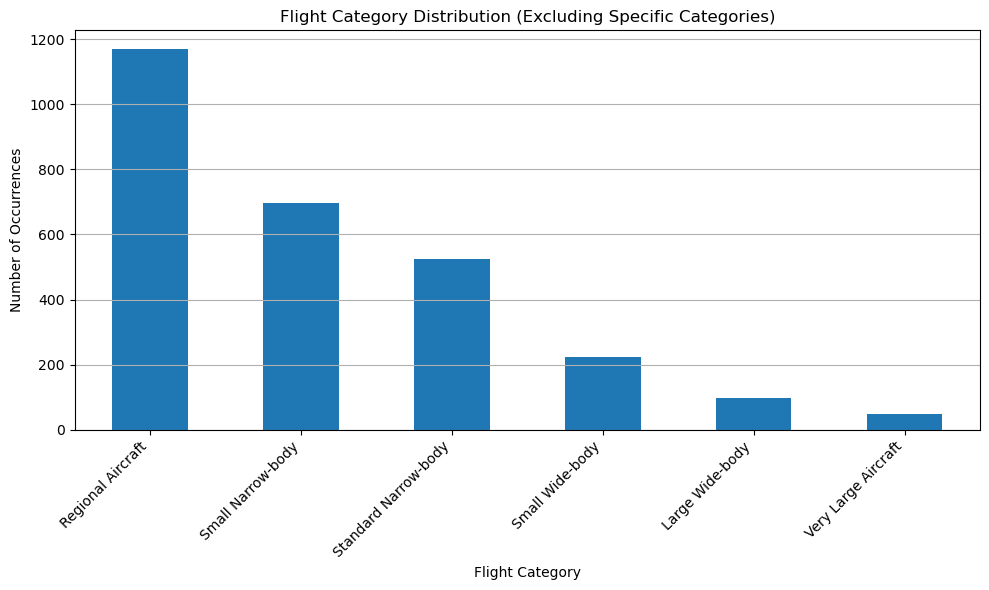

In [55]:
# Exclude unknown and below regional (has a capacity less than 19 passengers)
exclude_categories = ['Unknown', 'Below Regional']

# Filter the value counts
category_counts = df['Flight_Category'].value_counts()
filtered_category_counts = category_counts[~category_counts.index.isin(exclude_categories)] # keeps only the categories not in the excluded list

# Plotting
plt.figure(figsize=(10,6))
filtered_category_counts.plot(kind='bar')

plt.title('Flight Category Distribution (Excluding Specific Categories)')
plt.xlabel('Flight Category')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Interpretation** 
The largest number of accidents (or incidents) involved Regional Aircraft — those typically carrying 19–100 passengers. Small Narrow-body (100–150 passengers) and Standard Narrow-body (150–220 passengers) categories come next and followed closely by the Standard Narrow-body. Small Wide-body, Large Wide-body, and Very Large Aircraft have much lower counts.

Most incidents occur with smaller aircraft (regional and narrow-body jets), this may be attributable to the sheer operational volume and flight frequency. Wide-body and Very Large aircraft incidents are relatively rare owing to lower operational numbers and international route protections. 

Observation: If an airline targets regional or domestic markets, operational safety management must be especially strong to mitigate risk in high-frequency environments.

In [56]:
# Define classification function for private flight category
def classify_private_aviation(total):
    if pd.isna(total):
        return 'Unknown'
    elif total >= 2 and total <= 4:
        return 'Very Light Jets (VLJs)'
    elif total > 4 and total <= 8:
        return 'Light Jets'
    elif total > 8 and total <= 10:
        return 'Midsize Jets'
    elif total > 10 and total <= 12:
        return 'Super-Midsize Jets'
    elif total > 12 and total <= 16:
        return 'Large Cabin Jets'
    elif total > 16 and total <= 19:
        return 'Ultra-Long-Range Jets'
    elif total >= 20:
        return 'VIP Airliners (Bizliners)'
    else:
        return 'Below Category'

# Apply the classification
df['Private_Flight_Category'] = df['Total_Occupants'].apply(classify_private_aviation)

# Preview the result
#print(df[['Total_Occupants', 'Private_Flight_Category']].head(10))
df['Private_Flight_Category'].value_counts()

Private_Flight_Category
Very Light Jets (VLJs)       38935
Below Category               37060
Unknown                       5897
Light Jets                    3273
VIP Airliners (Bizliners)     2734
Midsize Jets                   354
Large Cabin Jets               227
Super-Midsize Jets             193
Ultra-Long-Range Jets          104
Name: count, dtype: int64

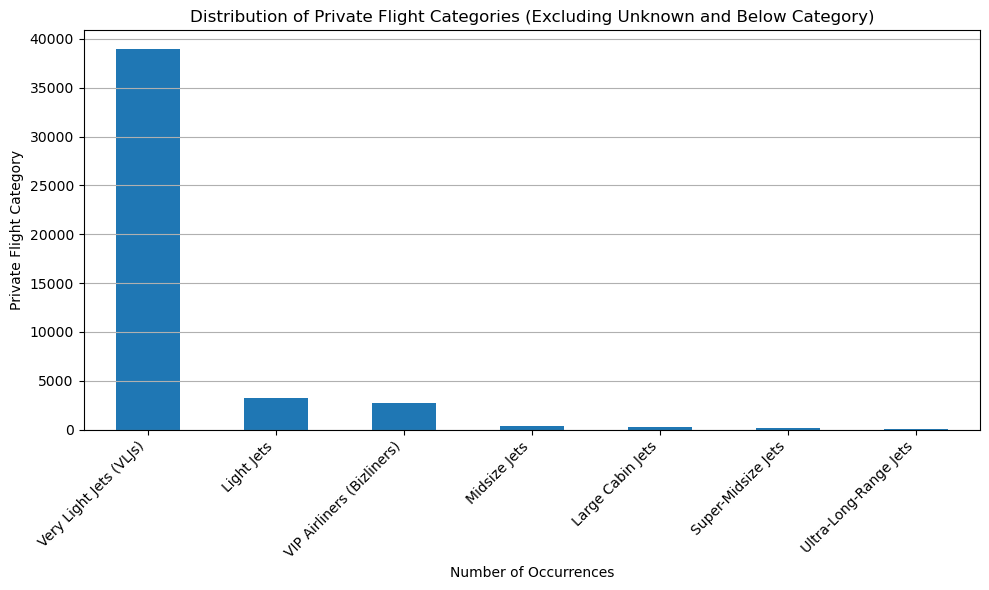

In [57]:
# Prepare a graph showing occurances based on grouping created
private_category_counts = df['Private_Flight_Category'].value_counts()

# Define categories to exclude
exclude_categories = ['Unknown', 'Below Category']

# Filter out the excluded categories
filtered_private_category_counts = private_category_counts[~private_category_counts.index.isin(exclude_categories)]

# Plotting
plt.figure(figsize=(10,6))
filtered_private_category_counts.plot(kind='bar')
plt.title('Distribution of Private Flight Categories (Excluding Unknown and Below Category)')
plt.xlabel('Number of Occurrences')
plt.ylabel('Private Flight Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Interpretation** 
Very Light Jets (VLJs) - with 2–4 passengers make up by far the largest number of occurrences or aviation incidences. They are followed closely by Light Jets - (5–8 passengers) and VIP Airliners - Bizliners. The remaining categories (Midsize Jets, Large Cabin Jets, Super-Midsize Jets, and Ultra-Long-Range Jets) have very low occurrences.

### *Key assumptions*
In crafting the above categories (commercial and private aircrafts), some critical assumptions were made to enable us narrow down our data analysis. 
* There is an overlap between which airlines qualifies for consideration as private or commercial. In our analysis created variables will be combined with **purpose of flight** variable to perform further filtering.
* We will also exclude the data that did not fall into our desired categories.

In [58]:
# Create a Make and Model variable
df['Make_Model'] = df['Make'].astype(str) + ' ' + df['Model'].astype(str)
df.shape

(88777, 36)

**Step five - Create risk indicators**

**Fatality rate** is a key metric showing how deadly an accident was relative to the number of people involved
**Severity score** is a metric obtained by factoring in the impact of injuries + aircraft damage impact

In [59]:
# Create a column for Fatality Rate score where, fatality rate = Total Fatal Injuries) / (Total Occupants 
df['Fatality_Rate'] = df['Total.Fatal.Injuries'] / df['Total_Occupants']

In [60]:
# Create a 'Severity_Score' = (Total Fatal Injuries*100)+(Total Serious Injuries*50)+(Total Minor Injuries*10)+(Damage Score)
# Start computation of damage score
# Step 1 - Define the mapping dictionary called damage
damage_mapping = {
    'Minor': 10,
    'Substantial': 30,
    'Destroyed': 50,
    'Unknown': 20,    # In case Damage is listed as Unknown
    None: 0           # Missing damage info
}
# Step 2 - Apply the mapping to create a new Damage_Score column
df['Damage_Score'] = df['Aircraft.damage'].map(damage_mapping).fillna(0)

# Step 3: View the updated DataFrame
print(df[['Aircraft.damage', 'Damage_Score']].head(10))

# Calculate Severity Score
df['Severity_Score'] = (
    df['Total.Fatal.Injuries'] * 100 + 
    df['Total.Serious.Injuries'] * 50 + 
    df['Total.Minor.Injuries'] * 10 + 
    df['Damage_Score']
)

  Aircraft.damage  Damage_Score
0       Destroyed          50.0
1       Destroyed          50.0
2       Destroyed          50.0
3       Destroyed          50.0
4       Destroyed          50.0
5     Substantial          30.0
6       Destroyed          50.0
7     Substantial          30.0
8     Substantial          30.0
9     Substantial          30.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 0 to 90347
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Event.Id                 88777 non-null  object 
 1   Investigation.Type       88777 non-null  object 
 2   Accident.Number          88777 non-null  object 
 3   Event.Date               88777 non-null  object 
 4   Location                 88725 non-null  object 
 5   Country                  88552 non-null  object 
 6   Latitude                 34347 non-null  object 
 7   Longitude                34338 non-null  object 
 8   Airport.Code             50096 non-null  object 
 9   Airport.Name             52660 non-null  object 
 10  Injury.Severity          87798 non-null  object 
 11  Aircraft.damage          85605 non-null  object 
 12  Aircraft.Category        32245 non-null  object 
 13  Registration.Number      87438 non-null  object 
 14  Make                     88

**Severity score** has bee addded to our dataframe.

### Data Exploration and Vusalization

In [62]:
# Import necessary libraries for data visulaization
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df.info() # Check basic information about the dataset.

<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 0 to 90347
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Event.Id                 88777 non-null  object 
 1   Investigation.Type       88777 non-null  object 
 2   Accident.Number          88777 non-null  object 
 3   Event.Date               88777 non-null  object 
 4   Location                 88725 non-null  object 
 5   Country                  88552 non-null  object 
 6   Latitude                 34347 non-null  object 
 7   Longitude                34338 non-null  object 
 8   Airport.Code             50096 non-null  object 
 9   Airport.Name             52660 non-null  object 
 10  Injury.Severity          87798 non-null  object 
 11  Aircraft.damage          85605 non-null  object 
 12  Aircraft.Category        32245 non-null  object 
 13  Registration.Number      87438 non-null  object 
 14  Make                     88

In [64]:
# Data Export
#df.to_csv('Data/Aviation_Data_Cleaned.csv', index=False)  # index=False to avoid saving row numbers
#df.to_excel('Data/Aviation_Data_Cleaned.xlsx', index=False)  # index=False to avoid saving row numbers
df.to_csv('Data/Aviation_Data_Cleaned.txt', sep='\t', index=False)

### General overview of data

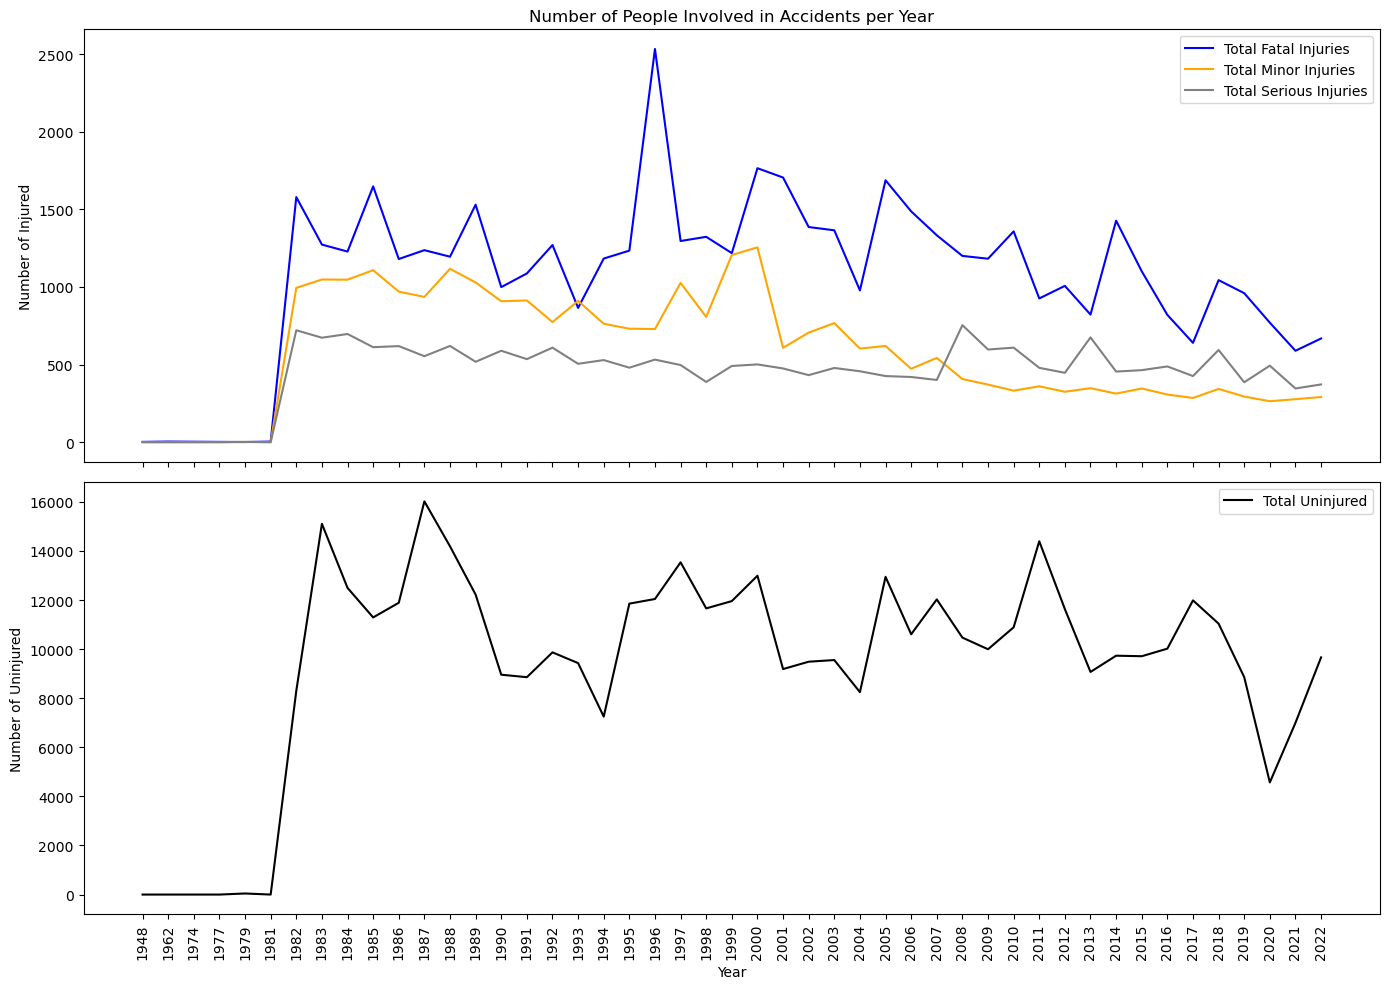

In [65]:
# Flight safety trends over the years.
#df_business = df[df['Purpose.of.flight'] == 'Business']

# Group by Year and sum injuries/uninjured
yearly_summary = df.groupby('Event_Year').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).reset_index()

# 4. Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Top chart: Injuries
ax1.plot(yearly_summary['Event_Year'], yearly_summary['Total.Fatal.Injuries'], label='Total Fatal Injuries', color='blue')
ax1.plot(yearly_summary['Event_Year'], yearly_summary['Total.Minor.Injuries'], label='Total Minor Injuries', color='orange')
ax1.plot(yearly_summary['Event_Year'], yearly_summary['Total.Serious.Injuries'], label='Total Serious Injuries', color='gray')
ax1.set_ylabel('Number of Injured')
ax1.set_title('Number of People Involved in Accidents per Year')
ax1.legend()

# Bottom chart: Uninjured
ax2.plot(yearly_summary['Event_Year'], yearly_summary['Total.Uninjured'], label='Total Uninjured', color='black')
ax2.set_ylabel('Number of Uninjured')
ax2.set_xlabel('Year')
ax2.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Interpretation** 
Overall, the data shows that before 1981 the number of people involved in aviation accidents were nearly negligible. Secondary information indicates that this period in aviation industry was characterized by rapid growth, technological innovation, and a shift towards a more deregulated and competitive market, ultimately leading to the consolidation of the industry. Thus, we can't absolutely say air flights were most safe during this period. Post 1981, reveals a surge in number of people injured (fatal, minor and serious, and subsequent drop in the number of accidents reported incidences. Similar trends are observed on the total uninjured passengers involved in flight accidents. The likely explanation for this gradual improvement in air safety may relate to changes in aviation regulations, mandatory reporting laws, or more thorough NTSB accident investigations starting in the early 1980s. Also, a sharp reduction in number involved in accidents in the year 2020. This period was characterized by reduction of flights volumes due to restrictions put forth to contain the spread of the COVID-19 pandemic.

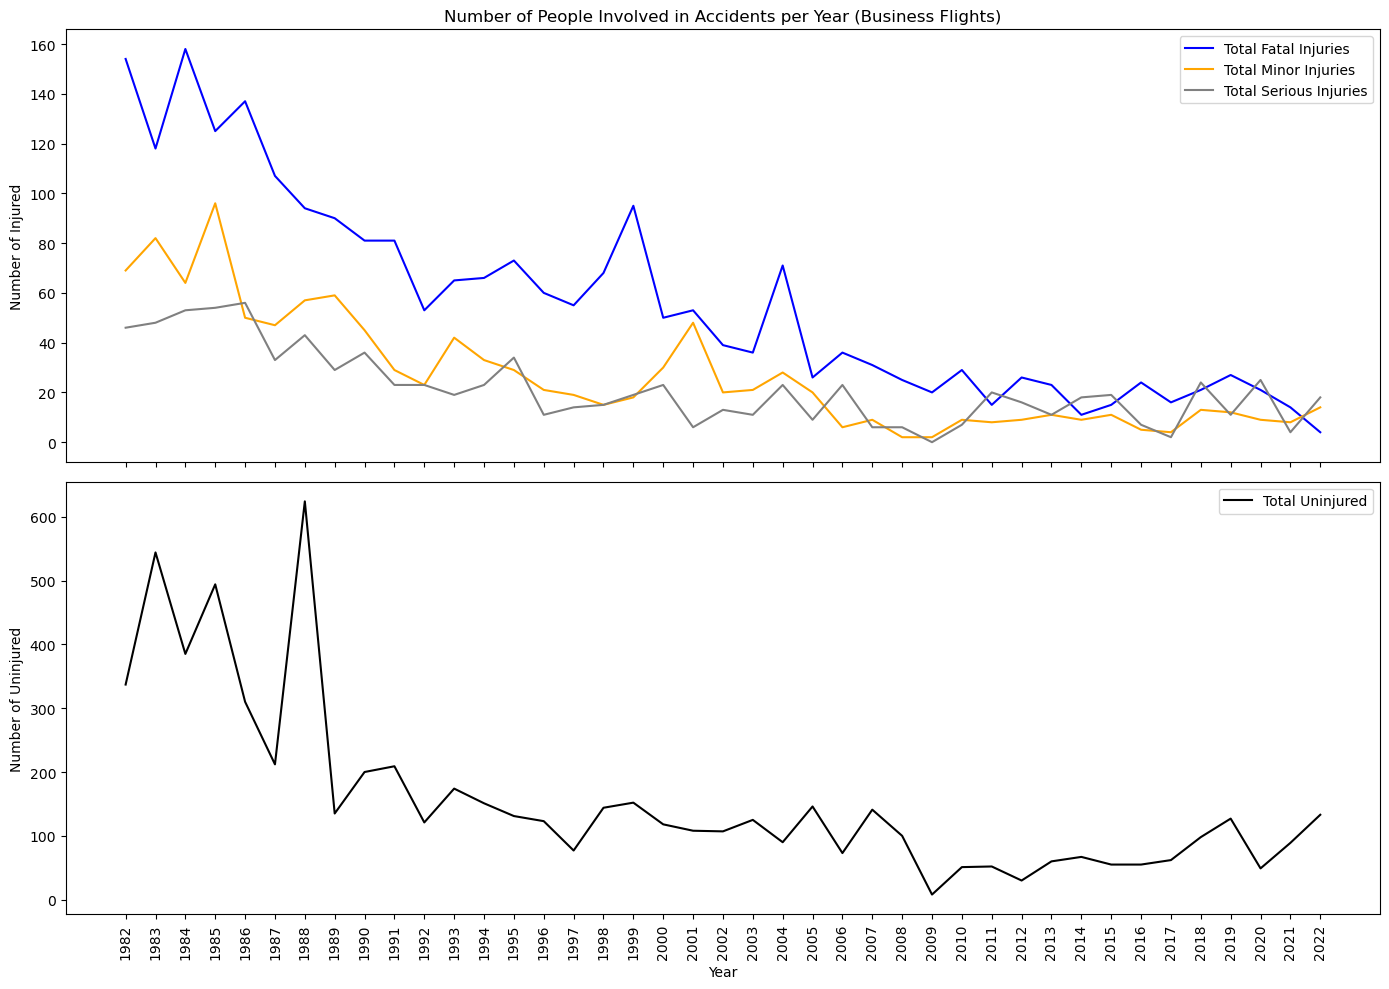

In [66]:
# Filter for Business purpose only
df_business = df[df['Purpose.of.flight'] == 'Business']

# Group by Year and sum injuries/uninjured
yearly_summary = df_business.groupby('Event_Year').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).reset_index()

# 4. Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Top chart: Injuries
ax1.plot(yearly_summary['Event_Year'], yearly_summary['Total.Fatal.Injuries'], label='Total Fatal Injuries', color='blue')
ax1.plot(yearly_summary['Event_Year'], yearly_summary['Total.Minor.Injuries'], label='Total Minor Injuries', color='orange')
ax1.plot(yearly_summary['Event_Year'], yearly_summary['Total.Serious.Injuries'], label='Total Serious Injuries', color='gray')
ax1.set_ylabel('Number of Injured')
ax1.set_title('Number of People Involved in Accidents per Year (Business Flights)')
ax1.legend()

# Bottom chart: Uninjured
ax2.plot(yearly_summary['Event_Year'], yearly_summary['Total.Uninjured'], label='Total Uninjured', color='black')
ax2.set_ylabel('Number of Uninjured')
ax2.set_xlabel('Year')
ax2.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Interpretation** The first graph shows that between 1948 and 1981, the number of injuries (fatal, serious and minor) using business flights was very low, almost negligible. However, there was a sudden surge in all types of injuries. The second graph also indicates similar trend in the total number of people uninjured while using personal flights. In aviation industry, this period was characterized by rapid growth, technological innovation, and a shift towards a more deregulated and competitive market, ultimately leading to the consolidation of the industry.

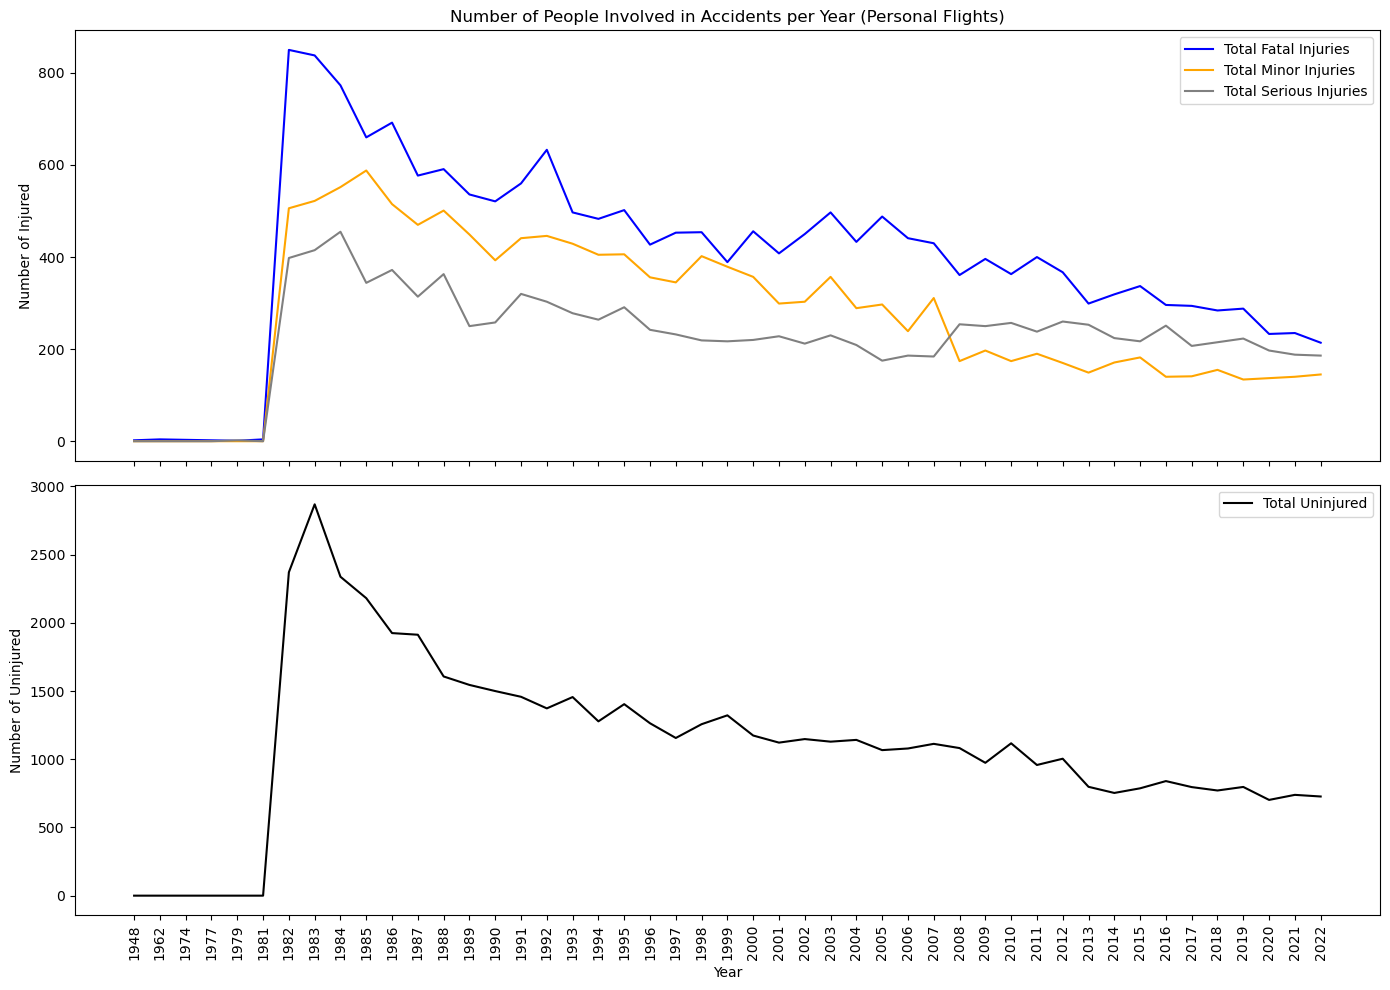

In [67]:
# Filter for Personal purpose only
df_Personal = df[df['Purpose.of.flight'] == 'Personal']

# Group by Year and sum injuries/uninjured
yearly_summary = df_Personal.groupby('Event_Year').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).reset_index()

# 4. Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Top chart: Injuries
ax1.plot(yearly_summary['Event_Year'], yearly_summary['Total.Fatal.Injuries'], label='Total Fatal Injuries', color='blue')
ax1.plot(yearly_summary['Event_Year'], yearly_summary['Total.Minor.Injuries'], label='Total Minor Injuries', color='orange')
ax1.plot(yearly_summary['Event_Year'], yearly_summary['Total.Serious.Injuries'], label='Total Serious Injuries', color='gray')
ax1.set_ylabel('Number of Injured')
ax1.set_title('Number of People Involved in Accidents per Year (Personal Flights)')
ax1.legend()

# Bottom chart: Uninjured
ax2.plot(yearly_summary['Event_Year'], yearly_summary['Total.Uninjured'], label='Total Uninjured', color='black')
ax2.set_ylabel('Number of Uninjured')
ax2.set_xlabel('Year')
ax2.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Interpretation** 
The first graph shows that between 1948 and 1981, the number of injuries (fatal, serious and minor) using personal flights was very low, almost negligible. However, there was a sudden surge in all types of injuries. The second graph also indicates similar trend in the total number of people uninjured while using personal flights.
In aviation industry, this period was characterized by rapid growth, technological innovation, and a shift towards a more deregulated and competitive market, ultimately leading to the consolidation of the industry.

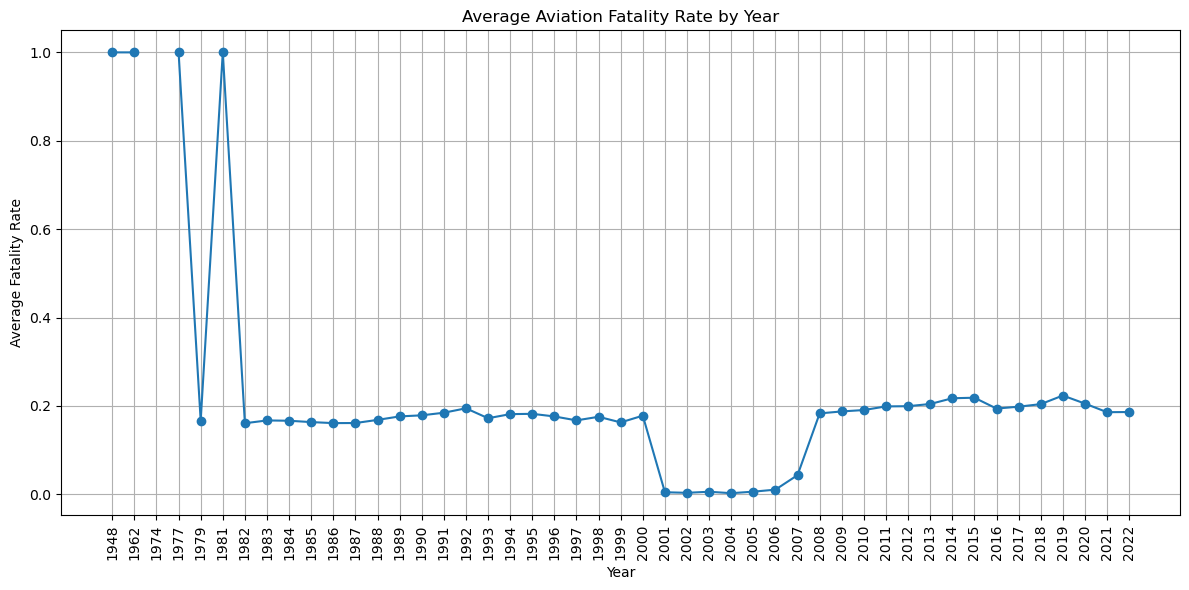

In [68]:
# Group by year and calculate average fatality rate
yearly_fatality_rate = df.groupby('Event_Year')['Fatality_Rate'].mean()
# Plot the trend
plt.figure(figsize=(12,6))
plt.plot(yearly_fatality_rate.index, yearly_fatality_rate.values, marker='o')
plt.title('Average Aviation Fatality Rate by Year')
plt.xlabel('Year')
plt.ylabel('Average Fatality Rate')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Interpretation** The graph displays the Average Aviation Fatality Rate by Year from 1948 to 2022. In the early years (1948–1980), the fatality rate is extremely high, reaching 1.0 (100%) in several years, indicating that accidents during that period were often fatal. Around 1979 to 1981, there is a sharp fluctuation with a temporary drop, suggesting some safer incidents or fewer fatalities during those specific years. From the early 1980s onward, the fatality rate shows a substantial decline and stabilizes around 0.16 to 0.2, reflecting significant improvements in aviation safety, technology, and regulation. Notably, between 2001 and 2007, the fatality rate drops dramatically to almost zero, indicating an exceptionally safe period. After 2008, the fatality rate slightly increases and stabilizes again between 0.18 and 0.22, suggesting a consistent but slightly higher fatality risk in more recent years compared to the early 2000s. Overall, the long-term trend clearly shows a major improvement in aviation safety compared to the earlier decades.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 0 to 90347
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Event.Id                 88777 non-null  object 
 1   Investigation.Type       88777 non-null  object 
 2   Accident.Number          88777 non-null  object 
 3   Event.Date               88777 non-null  object 
 4   Location                 88725 non-null  object 
 5   Country                  88552 non-null  object 
 6   Latitude                 34347 non-null  object 
 7   Longitude                34338 non-null  object 
 8   Airport.Code             50096 non-null  object 
 9   Airport.Name             52660 non-null  object 
 10  Injury.Severity          87798 non-null  object 
 11  Aircraft.damage          85605 non-null  object 
 12  Aircraft.Category        32245 non-null  object 
 13  Registration.Number      87438 non-null  object 
 14  Make                     88

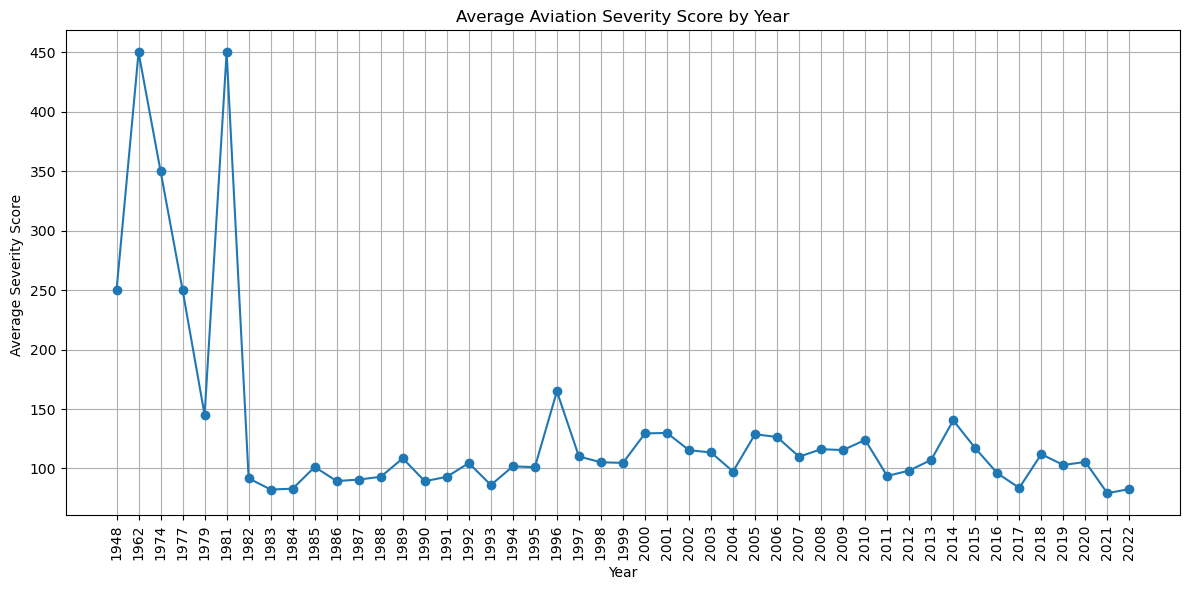

In [70]:
# Group by year and calculate average fatality rate
yearly_Severity_Score = df.groupby('Event_Year')['Severity_Score'].mean()
# Plot the trend
plt.figure(figsize=(12,6))
plt.plot(yearly_Severity_Score.index, yearly_Severity_Score.values, marker='o')
plt.title('Average Aviation Severity Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Severity Score ')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Interpretation** The graph shows the Average Aviation Severity Score by Year from 1948 to 2022. In the early years, particularly around 1962 and 1981, severity scores peaked sharply at around 450, indicating very serious and deadly aviation incidents with significant fatalities, injuries, and aircraft destruction. From the early 1980s onward, there is a notable and sustained decline in severity scores, stabilizing around 80 to 140 points. The data shows occasional minor spikes, such as in 1996, 2001, 2005, and 2014, but these increases are relatively small compared to earlier decades. Overall, the trend highlights a significant improvement in aviation safety over time, with modern aviation accidents being generally less severe than those in the early and mid-20th century. The downward movement and stabilization of severity scores suggest that industry safety measures, technological improvements, and stricter regulations have had a substantial positive impact on reducing the severity of aviation accidents.

### Narrow down the scope for analysis

**Fatality rate by business option - Commercial Enterprise**

In [71]:
# Group by Purpose_of_Flight and Flight_Category
# Exclude unwanted Flight Categories
# Define categories to exclude
exclude_flight_categories = ['Below Regional', 'Unknown']
exclude_purpose_of_flight = ['Unknown']

# Filter the dataframe
filtered_df = df[
    (~df['Flight_Category'].isin(exclude_flight_categories)) & 
    (~df['Purpose.of.flight'].isin(exclude_purpose_of_flight))
]

# Group by Purpose_of_Flight and Flight_Category
grouped_fatality_rate = filtered_df.groupby(['Purpose.of.flight', 'Flight_Category'])['Fatality_Rate'].mean().reset_index()

# Sort if you want to see highest fatality rates first
grouped_fatality_rate = grouped_fatality_rate.sort_values(by='Fatality_Rate', ascending=False)
# Display
print(grouped_fatality_rate)

            Purpose.of.flight       Flight_Category  Fatality_Rate
7                       Ferry  Standard Narrow-body       0.956522
9              Other Work Use     Regional Aircraft       0.250000
21                  Skydiving     Regional Aircraft       0.155518
11                   Personal     Regional Aircraft       0.087244
16            Public Aircraft     Regional Aircraft       0.014493
14                Positioning     Small Narrow-body       0.014085
15                Positioning  Standard Narrow-body       0.003145
4                    Business  Standard Narrow-body       0.000000
5         Executive/corporate     Regional Aircraft       0.000000
20  Public Aircraft - Federal     Small Narrow-body       0.000000
19            Public Aircraft  Standard Narrow-body       0.000000
18            Public Aircraft       Small Wide-body       0.000000
17            Public Aircraft     Small Narrow-body       0.000000
13                   Personal   Very Large Aircraft       0.00

In [72]:
# Group by Purpose_of_Flight and Flight_Category
# Exclude unwanted Flight Categories
# Define categories to exclude
exclude_flight_categories = ['Below Regional', 'Unknown']

# Filter the dataframe
filtered_df = df[
    (df['Purpose.of.flight'] == 'Business') & 
    (~df['Purpose.of.flight'].isin(exclude_flight_categories))
]

# Group by Purpose_of_Flight and Flight_Category
grouped_fatality_rate = filtered_df.groupby(['Purpose.of.flight', 'Flight_Category'])['Fatality_Rate'].mean().reset_index()

# Sort if you want to see highest fatality rates first
grouped_fatality_rate = grouped_fatality_rate.sort_values(by='Fatality_Rate', ascending=False)
# Display
print(grouped_fatality_rate)

  Purpose.of.flight       Flight_Category  Fatality_Rate
0          Business        Below Regional       0.222965
1          Business     Regional Aircraft       0.000000
2          Business     Small Narrow-body       0.000000
3          Business       Small Wide-body       0.000000
4          Business  Standard Narrow-body       0.000000
5          Business               Unknown            NaN


**Interpretation**
Considering the general purpose of flight, we consider dropping public aircrafts (neither commercial nor private - owned by state and government authorities), ferry, positioning, executive/corporate. Also, other categories excluded include skydiving, flight test, other work use and personal, as they fall outside the categories of interest. 
Aligning with our business focus of corporate enterprise, we consider categories with purpose of flight as business. Using the flight category, we consider the following flight categories of interest with zero fatality rate.

|Category Name	      | Typical Passenger Range| Fatality rate  |
----------------------|------------------------|-----------------|
|Regional Aircraft    | 19 to 100 passengers   |0.000000        |
|Small Narrow-body    | 100 to 150 passengers  |0.000000 |
|Standard Narrow-body | 150 to 220 passengers  |0.000000|
|Small Wide-body      | 220 to 300 passengers  |0.000000  |


In [73]:
# Define allowed categories based on your figure
allowed_categories = ['Regional Aircraft', 'Small Narrow-body', 'Small Wide-body', 'Standard Narrow-body']

# Filter the dataframe
filtered_df = df[
    (df['Purpose.of.flight'] == 'Business') &
    (df['Flight_Category'].isin(allowed_categories))
]

# Extract relevant columns
result = filtered_df[['Make', 'Model', 'Flight_Category', 'Fatality_Rate']]

# Drop duplicates if needed
result = result.drop_duplicates()

# Sort nicely
result = result.sort_values(by=['Flight_Category', 'Make', 'Model'])

# Display
print(result)

                Make            Model       Flight_Category  Fatality_Rate
46770          BEECH             C90A     Regional Aircraft            0.0
43511         BOEING          737-205     Regional Aircraft            0.0
4875   BOEING VERTOL            234ER     Regional Aircraft            0.0
86211        CAMERON            A 315     Regional Aircraft            0.0
83883        CAMERON            A-400     Regional Aircraft            0.0
10008         CESSNA     CITATION 550     Regional Aircraft            0.0
65660    DEHAVILLAND        DHC-8-311     Regional Aircraft            0.0
13278        VICKERS  VISCOUNT VC-810     Regional Aircraft            0.0
16109         BOEING          727-22C     Small Narrow-body            0.0
6907          CESSNA             421B     Small Narrow-body            0.0
19868  GATES LEARJET              24E     Small Narrow-body            0.0
20258          PIPER        PA-42-720       Small Wide-body            0.0
11104          PIPER     

***1.a Prefered commercial airline based on fatality rate***

Using the fatality rate information and business flight category, the proposed make and models for corporate business lines are as follows;

|Category Name	      | Typical Passenger Range| Fatality rate  | Recommended Make & Model |
----------------------|------------------------|-----------------|-------------------------|
|**Regional Aircraft**    | 19 to 100 passengers   |0.000000  | BEECH  C90A, BOEING 737-205, BOEING VERTOL 234ER, CAMERON A 315 and A-400, CESSNA CITATION 550, DEHAVILLAND DHC-8-311 or VICKERS VISCOUNT VC-810|
|**Small Narrow-body**   | 100 to 150 passengers  |0.000000 |BOEING 727-22C or CESSNA  421B or GATES LEARJET 24E|
|**Standard Narrow-body** | 150 to 220 passengers  |0.000000| PIPER PA-44-180|
|**Small Wide-body**     | 220 to 300 passengers  |0.000000  |PIPER PA-42-720|

### Fatality rate by business option - Private Enterprise

In [74]:
# Group by Purpose_of_Flight and Flight_Category
# Exclude unwanted Flight Categories
# Define categories to exclude
exclude_pflight_categories = ['Below Category', 'Unknown']

# Filter the dataframe
filtered_df = df[
    (df['Purpose.of.flight'] == 'Personal') & 
    (~df['Private_Flight_Category'].isin(exclude_pflight_categories))
]

# Group by Purpose_of_Flight and Flight_Category
grouped_pfatality_rate = filtered_df.groupby(['Purpose.of.flight', 'Private_Flight_Category'])['Fatality_Rate'].mean().reset_index()

# Sort if you want to see highest fatality rates first
grouped_pfatality_rate = grouped_pfatality_rate.sort_values(by='Fatality_Rate', ascending=False)
# Display
print(grouped_pfatality_rate)

  Purpose.of.flight    Private_Flight_Category  Fatality_Rate
2          Personal               Midsize Jets       0.312444
3          Personal         Super-Midsize Jets       0.278283
1          Personal                 Light Jets       0.240244
6          Personal     Very Light Jets (VLJs)       0.170893
0          Personal           Large Cabin Jets       0.153846
5          Personal  VIP Airliners (Bizliners)       0.075612
4          Personal      Ultra-Long-Range Jets       0.000000


***1.b Prefered Private aircraft based on fatality rate***

Using the fatality rate information and private flight category, the proposed make and models for corporate business lines are as follows;
In ranking, based on fatality rate, Ultra-Long-Range Jets have lowest risk with (fatality rate of zero), followed by VIP Airliners (Bizliners) at 0.075, Large Cabin Jets (0.15), Very Light Jets (0.17), Light Jets (0.24)

|Category Name	      | Typical Passenger Range| Fatality rate
----------------------|------------------------|------------------|
|Very Light Jets (VLJs)| 2–4 passengers   |0.170893          |
|Light Jets    | 5–8 passengers  |0.240244  |
|Midsize Jets | 7–10 passengers  |0.312444|
|Super-Midsize Jets     | 8–12 passengers  |0.278283           |
|Large Cabin Jets	  | 10–16 passengers  |0.153846   |
|Ultra-Long-Range Jets  | 12–19 passengers        |0.000000    |
|VIP Airliners (Bizliners)  | 20–100+ passengers        |0.075612   |

In [75]:
df['Private_Flight_Category'].value_counts()

Private_Flight_Category
Very Light Jets (VLJs)       38935
Below Category               37060
Unknown                       5897
Light Jets                    3273
VIP Airliners (Bizliners)     2734
Midsize Jets                   354
Large Cabin Jets               227
Super-Midsize Jets             193
Ultra-Long-Range Jets          104
Name: count, dtype: int64

In [76]:
# Define allowed categories based on your figure
#p_allowed_categories = ['Very Light Jets (VLJs)', 'Light Jets', 'VIP Airliners (Bizliners)', 'Midsize Jets','Large Cabin Jets','Super-Midsize Jets','Ultra-Long-Range Jets','Ultra-Long-Range Jets']
p_allowed_categories = ['VIP Airliners (Bizliners)', 'Large Cabin Jets','Ultra-Long-Range Jets']

# Filter the dataframe
filtered_df = df[
    (df['Purpose.of.flight'] == 'Personal') &
    (df['Private_Flight_Category'].isin(p_allowed_categories))&
    (df['Fatality_Rate'] == 0) 
]

# Extract relevant columns
result = filtered_df[['Make', 'Model', 'Private_Flight_Category', 'Fatality_Rate']]

# Drop any duplicates if there
result = result.drop_duplicates()

# Sort nicely
result = result.sort_values(by=['Private_Flight_Category', 'Make', 'Model'])

# Display
print(result)


                       Make          Model    Private_Flight_Category  \
50539                  BELL           206B           Large Cabin Jets   
50546  GULFSTREAM AEROSPACE           G-IV           Large Cabin Jets   
42423               PILATUS  BN-2 ISLANDER           Large Cabin Jets   
53505                 PIPER      PA-24-260           Large Cabin Jets   
19596                CESSNA           172P      Ultra-Long-Range Jets   
3702                 BOEING        747-123  VIP Airliners (Bizliners)   
68036                CESSNA           172M  VIP Airliners (Bizliners)   
35416                CESSNA            185  VIP Airliners (Bizliners)   
32367                CESSNA            206  VIP Airliners (Bizliners)   
9935                 CESSNA           310J  VIP Airliners (Bizliners)   
12054                CESSNA           421C  VIP Airliners (Bizliners)   
88336     MCDONNELL DOUGLAS        DC-9-87  VIP Airliners (Bizliners)   
10084                MOONEY           M20C  VIP Air

Looking at the top three least-risk aircrafts for private enterprise, we identify the following aircraft makes and models for consideration.

***Fatality rate table***
|Category Name	      | Typical Passenger Range| fatality rate (mean)| Recommended Make and Model|
----------------------|------------------------|------------------|-------------------------------|
|**Large Cabin Jets**	  | 10–16 passengers  |0.000000    | BELL 206B, GULFSTREAM AEROSPACE G-IV, PILATUS BN-2 ISLANDER,  PIPER PA-24-260|
|**Ultra-Long-Range Jets**  | 12–19 passengers        |0.000000    | CESSNA 172P |
|**VIP Airliners (Bizliners)**  | 20–100+ passengers        |0.000000    | BOEING 747-123, CESSNA 172M, 185, 206, 310J, 421C,MCDONNELL DOUGLAS DC-9-87,  MOONEY M20C, PIPER PA-30, PA-46 or SWEARINGEN SA-226TC|

***2.a Prefered commercial aircraft based on severity rate***

In [77]:
# Group by Purpose_of_Flight and Flight_Category
# Exclude unwanted Flight Categories
# Define categories to exclude
exclude_flight_categories = ['Below Regional', 'Unknown']

# Filter the dataframe
filtered_df = df[
    (df['Purpose.of.flight'] == 'Business') & 
    (~df['Purpose.of.flight'].isin(exclude_flight_categories))
]

# Group by Purpose_of_Flight and Flight_Category
grouped_fatality_rate = filtered_df.groupby(['Purpose.of.flight', 'Flight_Category'])['Severity_Score'].mean().reset_index()

# Sort if you want to see highest fatality rates first
grouped_fatality_rate = grouped_fatality_rate.sort_values(by='Severity_Score', ascending=False)
# Display
print(grouped_fatality_rate)

  Purpose.of.flight       Flight_Category  Severity_Score
5          Business               Unknown      230.777202
1          Business     Regional Aircraft      105.000000
0          Business        Below Regional       99.811024
2          Business     Small Narrow-body        6.666667
3          Business       Small Wide-body        0.000000
4          Business  Standard Narrow-body        0.000000



***Fatality and Severity score table***
|Category Name	      | Typical Passenger Range| Fatality rate  | Severity score |Recommendation|
----------------------|------------------------|-----------------|---------------| -------------------------|
|**Regional Aircraft**    | 19 to 100 passengers   |0.000000  | 105.000000 | Drop due to high severity score|
|**Small Narrow-body**   | 100 to 150 passengers  |0.000000 | 6.666667 |Drop due to high severity score, however consider if exploring low risk aster next two aircrafts|
|**Standard Narrow-body** | 150 to 220 passengers  |0.000000| 0.000000| Consider purchasing PIPER PA-44-180|
|**Small Wide-body**     | 220 to 300 passengers  |0.000000  |0.000000|Consider purchasing PIPER PA-42-720|

***2.b Prefered private aircraft based on severity rate***

In [78]:
# Group by Purpose_of_Flight and Flight_Category
# Exclude unwanted Flight Categories
# Define categories to exclude
s_allowed_categories = ['VIP Airliners (Bizliners)', 'Large Cabin Jets','Ultra-Long-Range Jets']

# Filter the dataframe
filtered_df = df[
    (df['Purpose.of.flight'] == 'Personal') &
    (df['Private_Flight_Category'].isin(s_allowed_categories))&
    (df['Fatality_Rate'] == 0) 
]

# Group by Purpose_of_Flight and Private_Flight_Category
grouped_Severity_Score = filtered_df.groupby(['Purpose.of.flight', 'Private_Flight_Category'])['Severity_Score'].mean().reset_index()

# Sort if you want to see highest fatality rates first
grouped_Severity_Score = grouped_Severity_Score.sort_values(by='Severity_Score', ascending=False)
# Display
print(grouped_Severity_Score)


  Purpose.of.flight    Private_Flight_Category  Severity_Score
0          Personal           Large Cabin Jets            46.0
2          Personal  VIP Airliners (Bizliners)            30.0
1          Personal      Ultra-Long-Range Jets             0.0



***Fatality and severity score table***
|Category Name	      | Typical Passenger Range| Fatality rate    | Severity score       | Recommendation |
----------------------|------------------------|------------------|----------------------|-------------------------------|
|**Large Cabin Jets**	  | 10–16 passengers  |0.000000    |    46.0  | Drop due to high severity score|
|**Ultra-Long-Range Jets**  | 12–19 passengers        |0.000000    |   0.0  | Consider purchasing CESSNA 172P |
|**VIP Airliners (Bizliners)**  | 20–100+ passengers        |0.000000 |    30.0   | Drop due to high severity score |

## Conclusions


Our **Project goal** was to identify aircraft models that present the lowest operational risk based on analysis of historical aviation incident data. To achieve this goal, we formulated three key questions to guide our data analysis and eventually make an informed decision. In these three questions, we sought to establish:
* Aircraft makes/models with the lowest rates of fatal and serious accidents
* Aircraft make/models have the fewest incidents resulting in the aircraft's damage
* Identify aircraft that are suitable for private and commercial enterprises

To answer these questions, we took a risk-centered approach to generate the evidence necessary to build an aviation division that not only meets market demand but does so with a strong emphasis on safety, operational resilience, and regulatory compliance. We performed necessary data cleaning procedures and created two columns based on the existing secondary information relating to passenger volume, flight types and the range.

**Table for categorization of corporate aircrafts**
|Category Name	      | Typical Passenger Range| Flight type                                |Category       |
----------------------|------------------------|--------------------------------------------|---------------|
|Regional Aircraft    | 19 to 100 passengers   |Short-haul domestic, Regional               |Domestic       |
|Small Narrow-body    | 100 to 150 passengers  |Short to medium-haul domestic and regional  |Regional       |
|Standard Narrow-body | 150 to 220 passengers  |Medium-haul domestic and short international|Regional       |
|Small Wide-body      | 220 to 300 passengers  |Medium to long-haul international           |International  |
|Large Wide-body	  | 300 to 400 passengers  |Long-haul international, intercontinental   |International  |
|Very Large Aircraft  | 400+ passengers        |Ultra long-haul, high-density hubs          |Ultra-long haul|

Also, for private enterprise acquisition strategy, we could consider the passenger volume (capacity) and flight type.

**Table for categorization of private aircrafts**
|Category Name	      | Typical Passenger Range| Flight type                                |Category       |
----------------------|------------------------|--------------------------------------------|---------------|
|Very Light Jets (VLJs)| 2–4 passengers   |Short regional trips (1-2 hour flights)          |Domestic       |
|Light Jets    | 5–8 passengers  |Short-haul business trips, private charters  |Regional       |
|Midsize Jets | 7–10 passengers  |Cross-country U.S. flights, medium-range international|Regional       |
|Super-Midsize Jets     | 8–12 passengers  |U.S. coast-to-coast, Europe-Middle East           |International  |
|Large Cabin Jets	  | 10–16 passengers  |Transatlantic, international business travel   |International  |
|Ultra-Long-Range Jets  | 12–19 passengers        |Global nonstop flights (e.g., New York to Tokyo)    |Ultra-long haul|
|VIP Airliners (Bizliners)  | 20–100+ passengers        |VIP groups, heads of state, luxury charters   |Ultra-long haul|

We further developed two risk-based metrics to help us filter choices and converge to a specific decision on acquisition. Based on this process, we present the following summary.

**Commercial Enterprise Aircraft**

Using the grouping of the aircraft, by categories in column one, and computation of fatality rate and severity score, a two-step process was employed in zeroing into the least-risk aircraft. Aircrafts with zero risk ratings were considered and picked for consideration as those that can be acquired for commercial enterprise. The summary is as tabulated below, with our findings narrowing in favour of PIPER PA-44-180 and PIPER PA-42-720 being under Standard Narrow-body and Small Wide-body respectively.

***Fatality and Severity score table***
|Category Name	      | Typical Passenger Range| Fatality rate  | Severity score |Recommendation|
----------------------|------------------------|-----------------|---------------| -------------------------|
|**Regional Aircraft**    | 19 to 100 passengers   |0.000000  | 105.000000 | Drop due to high severity score|
|**Small Narrow-body**   | 100 to 150 passengers  |0.000000 | 6.666667 |Drop due to high severity score, however consider if exploring low-risk aster next two aircrafts|
|**Standard Narrow-body** | 150 to 220 passengers  |0.000000| 0.000000| Consider purchasing PIPER PA-44-180|
|**Small Wide-body**     | 220 to 300 passengers  |0.000000  |0.000000|Consider purchasing PIPER PA-42-720|


***Private Enterprise Aircraft***
Similary, the same approach was employed in determining the most sutable aircraft for private enterprise. With our findings favouring the purchase of CESSNA 172P to facilitate Global nonstop flights (e.g., New York to Tokyo) for passengers between 12 and 19 passangers. 

***Fatality and severity score table***
|Category Name	      | Typical Passenger Range| Fatality rate    | Severity score       | Recommendation |
----------------------|------------------------|------------------|----------------------|-------------------------------|
|**Large Cabin Jets**	  | 10–16 passengers  |0.000000    |    46.0  | Drop due to high severity score|
|**Ultra-Long-Range Jets**  | 12–19 passengers        |0.000000    |   0.0  | Consider purchasing CESSNA 172P |
|**VIP Airliners (Bizliners)**  | 20–100+ passengers        |0.000000 |    30.0   | Drop due to high severity score |


## Recommendations

1. **Commercial Aircraft acquisition**
Based on risk assessment, two categories of aircrafts with zero fatality and severity emerge. 
* **The Standard Narrow body** which has passenger capacity of between **150 and 220 passengers**. The suitable aircraft make and model for consideration is **PIPER PA-44-180**
* **Small Wide-body** which has a passenger capacity of between  **220 and 300 passengers**. The suitable aircraft make and model for consideration is **PIPER PA-42-720**
These two aircrafts recommended provide the company with an to explore Medium-haul domestic including short, Medium to long-haul international flights. Thus, with the acquisition, the company can commercially explore both domestic, regional and international airline routes.


2. **Private Aircraft Acquisition**
Based on risk assessment, one category of aircraft present zero fatality rate and severity score. This alligns well with our risk centrered approach, that is; 
* The company through the head of aviation division should consider acquisition of **Ultra-Long-Range Jets** with a passenger range of **12 to 19 passengers**. The most suitable aircraft under this category is **CESSNA 172P**. The aircraft can provide global nonstop flights (e.g., between New York to Tokyo). Thus favourable for Ultra-long haul of private clients.
